#初めに

【日付】2021/10/18
問題はどこから解いてもエラーはでないようになっている(はずです)。<br>
問題にはすべて見出しがついており、辞書のように逆引きでの使用もできます。

問題で使用するデータセットは以下を参考に一部加工を加えたものです。<br>
・Kaggle Home Credit Default Risk<br> 
URL: https://www.kaggle.com/c/home-credit-default-risk<br><br>
・UCI machine learning repository No.352<br>
URL: http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

#事前準備
以下の1つ目と2つ目のセルは必要な場合事前に実行してください。<br>
3つ目のセルはDataFrameを初期化する関数です。ノックを始める前に実行しておいてください。

In [13]:
# Google Drive上にアップロードし、Colabで本コードを使用する場合はDriveをマウントする
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# カレントディレクトリを本コードの置いてあるディレクトリに指定
%cd /content/drive/MyDrive/project/basic_pandas-x-knocks/

/content/drive/MyDrive/project/basic_pandas-x-knocks


In [15]:
import pandas as pd
def initialize(flag=0):
    if flag==0: return pd.read_csv('./data/main.csv')
    elif flag==1: return pd.read_csv('./data/add.csv')
    elif flag==2: return pd.read_excel('./data/data.xlsx')

# データの読み込み・確認

### pandasインポート

In [16]:
# pandasをpdという名でインポート
import pandas as pd

### pandasのversion確認

In [17]:
# インストールしているpandasのバージョンを確認
pd.__version__

'1.1.5'

Tips<br>
本資料作成時の使用versionは1.1.5<br>
2021/9/12にversion1.3.3がrelease

###csvファイルの読み込み

In [18]:
# dataディレクトリ内のmain.csv読み込んでデータフレームを作成し、dfという変数に格納
df = pd.read_csv('./data/main.csv')

# dataディレクトリ内のadd.csv読み込んでデータフレームを作成し、addという変数に格納
add = pd.read_csv('./data/add.csv')

Tips<br>
必要に応じてencodingを指定する<br>
<引数の例><br>
utf-8<br>
shift_jis (日本語)<br>
cp932 (Windows拡張文字含む日本語)<br>

###excelファイルの読み込み

In [19]:
# dataディレクトリ内のdata.xlsx読み込んでデータフレームを作成し、df_aという変数に格納
# 読み込みの際に、事前に型を以下のように指定する
"""
    'InvoiceNo':   'object',
    'StockCode':   'object',
    'Description': 'object',
    'Quantity':    'int8',
    'InvoiceDate': 'object',
    'UnitPrice':   'float16',
    'CustomerID':  'object',
    'Country':     'object'
"""

dtypes = {
    'InvoiceNo':   'object',
    'StockCode':   'object',
    'Description': 'object',
    'Quantity':    'int8',
    'InvoiceDate': 'object',
    'UnitPrice':   'float16',
    'CustomerID':  'object',
    'Country':     'object'
}

df_a = pd.read_excel('./data/data.xlsx', dtype=dtypes)

### 先頭行の出力

In [20]:
# dfの先頭3行を表示
df = initialize(0)  # 初期化

df.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,1,0.018801,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1,0.003541,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,1,0.010032,26.0


### 末尾行の出力

In [21]:
# dfの末尾から3行を表示
df = initialize(0)  # 初期化

df.tail(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE
1997,102339,0,Revolving loans,F,Y,N,1,135000.0,1,0.003069,1.0
1998,102341,0,Revolving loans,F,N,N,2,202500.0,1,0.072508,NaN
1999,102343,0,Cash loans,M,N,Y,1,180000.0,1,0.008474,NaN


###データポイントをランダムにサンプリングして出力

In [22]:
# dfからランダムに7行出力
df = initialize(0)  # 初期化

df.sample(7)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE
576,100662,0,Cash loans,F,N,Y,0,67500.0,1,0.009657,NaN
752,100865,0,Cash loans,F,Y,Y,2,112500.0,1,0.006852,13.0
796,100911,0,Revolving loans,M,N,N,0,360000.0,1,0.072508,NaN
1990,102332,0,Cash loans,F,N,Y,0,112500.0,1,0.046220,NaN
1971,102312,0,Cash loans,F,N,Y,0,81000.0,1,0.015221,NaN
1585,101856,0,Cash loans,F,N,N,1,157500.0,1,0.018634,NaN
1470,101729,0,Cash loans,F,N,N,0,126000.0,1,0.030755,NaN


###DataFrameのサイズ確認

In [23]:
# dfのサイズを表示
df = initialize(0)  # 初期化

df.shape

(2000, 11)

### DaraFrameのレコード数確認

In [24]:
# dfのレコード数を出力
df = initialize(0)  # 初期化

len(df)

2000

### DataFrame内のレコード数、各列のデータ型、欠損値の有無を確認

In [25]:
# dfのカラムのデータ型と欠損値でない値の総数、メモリ使用量をすべて出力
df = initialize(0)  # 初期化

df.info(
    verbose=True, 
    null_counts=True
    )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  2000 non-null   int64  
 1   TARGET                      2000 non-null   int64  
 2   NAME_CONTRACT_TYPE          2000 non-null   object 
 3   CODE_GENDER                 2000 non-null   object 
 4   FLAG_OWN_CAR                2000 non-null   object 
 5   FLAG_OWN_REALTY             2000 non-null   object 
 6   CNT_CHILDREN                2000 non-null   int64  
 7   AMT_INCOME_TOTAL            2000 non-null   float64
 8   FLAG_MOBIL                  2000 non-null   int64  
 9   REGION_POPULATION_RELATIVE  2000 non-null   float64
 10  OWN_CAR_AGE                 693 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 172.0+ KB


# Label

### DataFrameの列名の取得

In [26]:
# dfのcolumn名をlist形式で取得
df = initialize(0)  # 初期化

df.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'FLAG_MOBIL',
 'REGION_POPULATION_RELATIVE',
 'OWN_CAR_AGE']

###DataFrameのindex名の取得

In [27]:
# dfのindex名一覧をndarray形式で取得
df = initialize(0)  # 初期化

df.index.values

array([   0,    1,    2, ..., 1997, 1998, 1999])

### column名をすべて変更

In [29]:
# column名をno1～no11というstr型の名前にすべて変更する
# ヒント：リスト内包表記を使用すると簡単
df = initialize(0)  # 初期化

df.columns = ['no' + str(i+1) for i in range(len(df.columns))]
display(df.head())

,no1,no2,no3,no4,no5,no6,no7,no8,no9,no10,no11
0,100002,1,Cash loans,M,N,Y,0,202500.0,1,0.018801,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1,0.003541,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,1,0.010032,26.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,1,0.008019,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,1,0.028663,NaN


###column名の一部変更

In [30]:
# カラム名CODE_GENDERをGENDERに変更する
df = initialize(0)  # 初期化

df = df.rename(columns = {'CODE_GENDER': "GENDER"})
display(df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,1,0.018801,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1,0.003541,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,1,0.010032,26.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,1,0.008019,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,1,0.028663,NaN


#データ型

###任意の列のデータ型を確認

In [31]:
# dfのAMT_INCOME_TOTAL列のデータ型を出力
df = initialize(0)  # 初期化

df['AMT_INCOME_TOTAL'].dtype

dtype('float64')

### 複数列のデータ型を確認

In [32]:
# dfのAMT_INCOME_TOTAL列とFLAG_OWN_CAR列のデータ型を出力
df = initialize(0)  # 初期化

print(df[["AMT_INCOME_TOTAL", "FLAG_OWN_CAR"]].dtypes)

AMT_INCOME_TOTAL    float64
FLAG_OWN_CAR         object
dtype: object


###任意のデータ型の列のみ抽出

In [33]:
# 文字列型(object型)の列のみ表示
df = initialize(0)  # 初期化

df.select_dtypes(include='object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,Cash loans,M,N,Y
1,Cash loans,F,N,N
2,Revolving loans,M,Y,Y
3,Cash loans,F,N,Y
4,Cash loans,M,N,Y
...,...,...,...,...
1995,Cash loans,F,N,Y
1996,Cash loans,M,Y,Y
1997,Revolving loans,F,Y,N
1998,Revolving loans,F,N,N


Tips<br>
exclude = 'object'<br>
でobject型以外

### データ型を変換

In [34]:
# dfのFLAG_MOBIL列のデータ型を文字型に変換する
df = initialize(0)  # 初期化

df['FLAG_MOBIL'] = df['FLAG_MOBIL'].astype(str)
print(df['FLAG_MOBIL'].dtypes)

object


# 各columnのデータの確認

### 任意の列のユニーク(一意)な要素を確認

In [35]:
# dfのCODE_GENDER列のユニークな要素を確認
df = initialize(0)  # 初期化

df["CODE_GENDER"].unique()

array(['M', 'F'], dtype=object)

### 各列のユニークな要素の数を確認

In [36]:
# dfの各列のユニークな要素の数を出力
df = initialize(0)  # 初期化

df.nunique()

SK_ID_CURR                    2000
TARGET                           2
NAME_CONTRACT_TYPE               2
CODE_GENDER                      2
FLAG_OWN_CAR                     2
FLAG_OWN_REALTY                  2
CNT_CHILDREN                     5
AMT_INCOME_TOTAL               139
FLAG_MOBIL                       1
REGION_POPULATION_RELATIVE      78
OWN_CAR_AGE                     36
dtype: int64

### 任意の列のユニークな要素の数とその出現回数を確認

In [37]:
# dfのCNT_CHILDREN列の要素と出現回数の確認
df = initialize(0)  # 初期化

df["CNT_CHILDREN"].value_counts()

0    1414
1     388
2     170
3      26
4       2
Name: CNT_CHILDREN, dtype: int64

# データの取り出し

### 任意の１つの列の取り出し

In [38]:
# dfのTARGETの列のみ表示
df = initialize(0)  # 初期化

df["TARGET"]

0       1
1       0
2       0
3       0
4       0
       ..
1995    1
1996    0
1997    0
1998    0
1999    0
Name: TARGET, Length: 2000, dtype: int64

In [39]:
# dfの左から3番目の列のみ表示
df = initialize(0)  # 初期化

df.iloc[:, 3]

0       M
1       F
2       M
3       F
4       M
       ..
1995    F
1996    M
1997    F
1998    F
1999    M
Name: CODE_GENDER, Length: 2000, dtype: object

### 複数の列の表示

In [40]:
# dfのTARGET列とCODE_GENDER列のみ表示
df = initialize(0)  # 初期化


df[["TARGET", "CODE_GENDER"]]

,TARGET,CODE_GENDER
0,1,M
1,0,F
2,0,M
3,0,F
4,0,M
...,...,...
1995,1,F
1996,0,M
1997,0,F
1998,0,F


In [41]:
# dfのTARGET列とCODE_GENDER列までの列を表示
df = initialize(0)  # 初期化

df.loc[:, 'TARGET': 'CODE_GENDER']

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER
0,1,Cash loans,M
1,0,Cash loans,F
2,0,Revolving loans,M
3,0,Cash loans,F
4,0,Cash loans,M
...,...,...,...
1995,1,Cash loans,F
1996,0,Cash loans,M
1997,0,Revolving loans,F
1998,0,Revolving loans,F


In [42]:
# dfの3列目と8列目のみ表示
df = initialize(0)  # 初期化

df.iloc[:, [3, 8]]

,CODE_GENDER,FLAG_MOBIL
0,M,1
1,F,1
2,M,1
3,F,1
4,M,1
...,...,...
1995,F,1
1996,M,1
1997,F,1
1998,F,1


In [43]:
# dfの2列目から5列までの列を表示
df = initialize(0)  # 初期化

df.iloc[:, 2: 5]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR
0,Cash loans,M,N
1,Cash loans,F,N
2,Revolving loans,M,Y
3,Cash loans,F,N
4,Cash loans,M,N
...,...,...,...
1995,Cash loans,F,N
1996,Cash loans,M,Y
1997,Revolving loans,F,Y
1998,Revolving loans,F,N


###任意の１つのデータポイントの取り出し

In [44]:
# dfの上から4番目のデータポイントを表示
df = initialize(0)  # 初期化

df.loc[4]

SK_ID_CURR                        100007
TARGET                                 0
NAME_CONTRACT_TYPE            Cash loans
CODE_GENDER                            M
FLAG_OWN_CAR                           N
FLAG_OWN_REALTY                        Y
CNT_CHILDREN                           0
AMT_INCOME_TOTAL                  121500
FLAG_MOBIL                             1
REGION_POPULATION_RELATIVE      0.028663
OWN_CAR_AGE                          NaN
Name: 4, dtype: object

### 複数のデータポイントの取り出し

In [45]:
# dfのAMT_INCOME_TOTAL列のindexが3から10まで表示
df = initialize(0)  # 初期化

df.loc[3: 10, 'AMT_INCOME_TOTAL']

3     135000.0
4     121500.0
5      99000.0
6     171000.0
7     360000.0
8     112500.0
9     135000.0
10    112500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [46]:
# dfの7列目のindexが3から10まで表示
df = initialize(0)  # 初期化

df.iloc[3: 11, 7]

3     135000.0
4     121500.0
5      99000.0
6     171000.0
7     360000.0
8     112500.0
9     135000.0
10    112500.0
Name: AMT_INCOME_TOTAL, dtype: float64

###条件検索

In [91]:
# CODE_GENDER列が'F'かつAMT_INCOME_TOTAL列が500000以上のデータポイントを表示
df = initialize(0)  # 初期化

flag = (df["CODE_GENDER"] == 'F') & (df['AMT_INCOME_TOTAL'] >= 500000)
df[flag]    # Trueのデータポイントのみ抽出

# 別回
df.query("CODE_GENDER == 'F' & AMT_INCOME_TOTAL >= 500000")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE
332,100380,0,Cash loans,F,N,Y,0,630000.0,1,0.072508,NaN
930,101073,1,Cash loans,F,Y,N,0,540000.0,1,0.008474,18.0
1064,101235,0,Revolving loans,F,N,Y,0,720000.0,1,0.010147,NaN
1568,101839,0,Cash loans,F,N,N,0,630000.0,1,0.020713,NaN
1586,101857,0,Cash loans,F,N,Y,0,720000.0,1,0.046220,NaN
1644,101929,1,Revolving loans,F,Y,Y,0,697500.0,1,0.046220,7.0
1723,102015,0,Cash loans,F,N,Y,0,1935000.0,1,0.007114,NaN
1793,102097,0,Revolving loans,F,Y,Y,1,540000.0,1,0.032561,16.0


#DataFrameの操作

###DataFrameのコピーを作成

In [48]:
# dfのコピーをdf_copyに格納し、df_copyの先頭5行を表示
df = initialize(0)  # 初期化

df_copy = df.copy()
df_copy.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,1,0.018801,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1,0.003541,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,1,0.010032,26.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,1,0.008019,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,1,0.028663,NaN


Tips<br>
① df_copy = df と ② df_copy = df.copy では
挙動が異なるので注意

①の場合、df_copyはdfを参照しているだけのため、
df側の値を変えると、df_copy側の値も変わる
(dfとdf_copyは連動)

df側の値の変更をdf_copy側に反映させたくない
場合には②のcopy()を使う(dfとdf_copyは独立)

###特定の場所にデータを代入

In [49]:
# dfのTARGET列のindex3に40を代入(locを使用)し、先頭5行を表示
df = initialize(0)  # 初期化

df.loc[3, 'TARGET'] = 40
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,1,0.018801,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1,0.003541,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,1,0.010032,26.0
3,100006,40,Cash loans,F,N,Y,0,135000.0,1,0.008019,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,1,0.028663,NaN


In [50]:
# dfのTARGET列のindex3に20を代入(ilocを使用)し、先頭5列を表示
df = initialize(0)  # 初期化

df.iloc[3, 1] = 20
display(df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,1,0.018801,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1,0.003541,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,1,0.010032,26.0
3,100006,20,Cash loans,F,N,Y,0,135000.0,1,0.008019,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,1,0.028663,NaN


###データの置き換え

In [51]:
# CODE_GENDER列のMを0に、Fを1に置き換え先頭5列を表示
df = initialize(0)  # 初期化

df["CODE_GENDER"] = df["CODE_GENDER"].replace({
    'M': 0,
    'F': 1
})
display(df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE
0,100002,1,Cash loans,0,N,Y,0,202500.0,1,0.018801,NaN
1,100003,0,Cash loans,1,N,N,0,270000.0,1,0.003541,NaN
2,100004,0,Revolving loans,0,Y,Y,0,67500.0,1,0.010032,26.0
3,100006,0,Cash loans,1,N,Y,0,135000.0,1,0.008019,NaN
4,100007,0,Cash loans,0,N,Y,0,121500.0,1,0.028663,NaN


###小数点以下を丸める

In [52]:
# REGION_POPULATION_RELATIVE列の数値の小数点以下3桁に丸める
df = initialize(0)  # 初期化

df['REGION_POPULATION_RELATIVE'].round(3)

0       0.019
1       0.004
2       0.010
3       0.008
4       0.029
        ...  
1995    0.011
1996    0.019
1997    0.003
1998    0.073
1999    0.008
Name: REGION_POPULATION_RELATIVE, Length: 2000, dtype: float64

### columnを追加

In [53]:
# dfに要素がすべて1のTESTという列を追加する
df = initialize(0)  # 初期化

df["TEST"] = 1
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,TEST
0,100002,1,Cash loans,M,N,Y,0,202500.0,1,0.018801,NaN,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1,0.003541,NaN,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,1,0.010032,26.0,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,1,0.008019,NaN,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,1,0.028663,NaN,1


### カラムを文字列としての結合

In [ ]:
# dfのTEST列にCODE_GENDER列の値とTARGET列の値の間に'_'を入れた文字列を代入する
# 例) M_1
df = initialize(0)  # 初期化

df["TEST"] = df["CODE_GENDER"] + '_' + df["TARGET"].astype(str)
df["TEST"].head(3)

0    M_1
1    F_0
2    M_0
Name: TEST, dtype: object

###行列の入れ替え

In [54]:
# dfの行と列を入れ替えてdf_tmpという変数に格納する
df = initialize(0)  # 初期化

df_tmp = df.transpose()
df_tmp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
SK_ID_CURR,100002,100003,100004,100006,100007,100008,100009,100010,100011,100012,100014,100015,100016,100017,100018,100019,100020,100021,100022,100023,100024,100025,100026,100027,100029,100030,100031,100032,100033,100034,100035,100036,100037,100039,100040,100041,100043,100044,100045,100046,...,102299,102300,102301,102302,102304,102305,102306,102307,102308,102310,102311,102312,102313,102314,102316,102317,102318,102319,102320,102321,102322,102323,102324,102325,102326,102327,102328,102329,102330,102331,102332,102333,102334,102335,102336,102337,102338,102339,102341,102343
TARGET,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Revolving loans,Revolving loans,Cash loans,Revolving loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Revolving loans,...,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Revolving loans,Revolving loans,Cash loans
CODE_GENDER,M,F,M,F,M,M,F,M,F,M,F,F,F,M,F,M,M,F,F,F,M,F,F,F,M,F,F,M,M,M,F,F,F,M,F,F,F,M,F,M,...,F,F,M,F,M,M,M,F,F,F,M,F,F,F,F,M,M,M,F,F,F,F,F,F,F,M,F,M,F,F,F,F,M,M,M,F,M,F,F,M
FLAG_OWN_CAR,N,N,Y,N,N,N,Y,Y,N,N,N,N,N,Y,N,Y,N,N,N,N,Y,Y,N,N,Y,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,Y,...,Y,N,Y,N,N,N,N,N,N,N,Y,N,N,Y,Y,Y,Y,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,N,Y,N,Y,Y,N,N
FLAG_OWN_REALTY,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,Y,Y,N,Y,Y,Y,Y,Y,N,Y,N,Y,Y,Y,Y,Y,Y,Y,N,N,Y,N,Y,Y,Y,Y,...,Y,N,Y,N,Y,N,Y,Y,N,Y,Y,Y,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,Y,Y,N,N,Y,Y,Y,Y,Y,Y,Y,N,N,Y
CNT_CHILDREN,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,2,0,0,1,0,0,0,0,0,1,0,0,2,0,0,0,...,0,2,0,1,0,0,0,0,0,1,2,0,2,1,2,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1,2,1
AMT_INCOME_TOTAL,202500,270000,67500,135000,121500,99000,171000,360000,112500,135000,112500,38419.2,67500,225000,189000,157500,108000,81000,112500,90000,135000,202500,450000,83250,135000,90000,112500,112500,270000,90000,292500,112500,90000,360000,135000,112500,198000,121500,99000,180000,...,112500,49500,157500,144000,90000,157500,157500,117000,202500,270000,270000,81000,171000,225000,270000,360000,112500,135000,165150,99000,202500,270000,261000,157500,45000,180000,94500,225000,67500,54000,112500,135000,229500,189000,315000,49500,135000,135000,202500,180000
FLAG_MOBIL,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
REGION_POPULATION_RELATIVE,0.018801,0.003541,0.010032,0.008019,0.028663,0.035792,0.035792,0.003122,0.018634,0.019689,0.0228,0.015221,0.031329,0.016612,0.010006,0.020713,0.018634,0.010966,0.04622,0.015221,0.015221,0.025164,0.020713,0.006296,0.026392,0.028663,0.018029,0.019101,0.04622,0.030755,0.025164,0.008575,0.010032,0.015221,0.019689,0.008575,0.01885,0.030755,0.006207,0.025164,...,0.0228,0.002134,0.010556,0.035792,0.035792,0.035792,0.028663,0.008575,0.018801,0.072508,0.072508,0.015221,0.018634,0.010006,0.072508,0.072508,

### One-Hot-Encording

In [55]:
# CODE_GENDER列をOne-Hot-Encordingしたものにdfを更新し、先頭5行を表示
df = initialize(0)  # 初期化

df = pd.get_dummies(df, columns=['CODE_GENDER'])
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,CODE_GENDER_F,CODE_GENDER_M
0,100002,1,Cash loans,N,Y,0,202500.0,1,0.018801,NaN,0,1
1,100003,0,Cash loans,N,N,0,270000.0,1,0.003541,NaN,1,0
2,100004,0,Revolving loans,Y,Y,0,67500.0,1,0.010032,26.0,0,1
3,100006,0,Cash loans,N,Y,0,135000.0,1,0.008019,NaN,1,0
4,100007,0,Cash loans,N,Y,0,121500.0,1,0.028663,NaN,0,1


### ラムダ式による列要素毎の処理

In [98]:
# dfのAMT_INCOME_TOTAL列の各要素の対数を取り、dfのLOG_AMT_INCOME_TOTALに代入し先頭3列を出力
# 対数の計算にはnp.log(x+1)を使用する(log(0)は定義できないため)
df = initialize(0)  # 初期化
import numpy as np

df['LOG_AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL'].apply(lambda x: np.log(x+1))
df.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,LOG_AMT_INCOME_TOTAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,1,0.018801,NaN,12.218500
1,100003,0,Cash loans,F,N,N,0,270000.0,1,0.003541,NaN,12.506181
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,1,0.010032,26.0,11.119898


Tips<br>
apply(lambda x: np.log(x+1), axis=1)とすることで行毎に関数を作用することもできる

###値のシフト

In [102]:
# dfのSK_ID_CURRの要素を一つずつ上にずらしてSK_ID_CURR列に代入する
df = initialize(0)  # 初期化

df['SK_ID_CURR'] = df['SK_ID_CURR'].shift(periods=-1)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE
0,100003.0,1,Cash loans,M,N,Y,0,202500.0,1,0.018801,NaN
1,100004.0,0,Cash loans,F,N,N,0,270000.0,1,0.003541,NaN
2,100006.0,0,Revolving loans,M,Y,Y,0,67500.0,1,0.010032,26.0
3,100007.0,0,Cash loans,F,N,Y,0,135000.0,1,0.008019,NaN
4,100008.0,0,Cash loans,M,N,Y,0,121500.0,1,0.028663,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1995,102338.0,1,Cash loans,F,N,Y,0,49500.0,1,0.010643,NaN
1996,102339.0,0,Cash loans,M,Y,Y,0,135000.0,1,0.018634,18.0
1997,102341.0,0,Revolving loans,F,Y,N,1,135000.0,1,0.003069,1.0
1998,102343.0,0,Revolving loans,F,N,N,2,202500.0,1,0.072508,NaN


#削除

### 列の削除

In [56]:
# dfのCODE_GENDER列を削除
df = initialize(0)  # 初期化

df.drop('CODE_GENDER', axis=1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE
0,100002,1,Cash loans,N,Y,0,202500.0,1,0.018801,NaN
1,100003,0,Cash loans,N,N,0,270000.0,1,0.003541,NaN
2,100004,0,Revolving loans,Y,Y,0,67500.0,1,0.010032,26.0
3,100006,0,Cash loans,N,Y,0,135000.0,1,0.008019,NaN
4,100007,0,Cash loans,N,Y,0,121500.0,1,0.028663,NaN
...,...,...,...,...,...,...,...,...,...,...
1995,102337,1,Cash loans,N,Y,0,49500.0,1,0.010643,NaN
1996,102338,0,Cash loans,Y,Y,0,135000.0,1,0.018634,18.0
1997,102339,0,Revolving loans,Y,N,1,135000.0,1,0.003069,1.0
1998,102341,0,Revolving loans,N,N,2,202500.0,1,0.072508,NaN


###行の削除

In [57]:
# dfの3行目を削除
df = initialize(0)  # 初期化

df.drop(3).head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,1,0.018801,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1,0.003541,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,1,0.010032,26.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,1,0.028663,NaN
5,100008,0,Cash loans,M,N,Y,0,99000.0,1,0.035792,NaN


#ソート

###任意の一列で昇順ソート

In [58]:
# dfのAMT_INCOME_TOTALの列で昇順ソートして表示
df = initialize(0)  # 初期化

df.sort_values('AMT_INCOME_TOTAL').head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE
1678,101965,0,Cash loans,F,N,N,0,25650.0,1,0.018850,NaN
495,100572,0,Cash loans,F,N,Y,0,31500.0,1,0.031329,NaN
283,100326,1,Cash loans,M,Y,Y,0,36000.0,1,0.018209,27.0
1221,101442,0,Cash loans,F,N,N,0,36000.0,1,0.018850,NaN
651,100743,0,Cash loans,F,N,Y,0,38250.0,1,0.018850,NaN


###任意の一列で降順ソート

In [59]:
# dfのAMT_INCOME_TOTALの列で降順ソート表示
df = initialize(0)  # 初期化

df.sort_values('AMT_INCOME_TOTAL', ascending=False)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE
1723,102015,0,Cash loans,F,N,Y,0,1935000.0,1,0.007114,NaN
1504,101769,0,Revolving loans,M,Y,Y,0,1080000.0,1,0.072508,7.0
1238,101461,0,Cash loans,M,Y,Y,0,810000.0,1,0.072508,5.0
319,100366,0,Revolving loans,M,Y,Y,0,765000.0,1,0.002506,3.0
1586,101857,0,Cash loans,F,N,Y,0,720000.0,1,0.046220,NaN
...,...,...,...,...,...,...,...,...,...,...,...
651,100743,0,Cash loans,F,N,Y,0,38250.0,1,0.018850,NaN
1221,101442,0,Cash loans,F,N,N,0,36000.0,1,0.018850,NaN
283,100326,1,Cash loans,M,Y,Y,0,36000.0,1,0.018209,27.0
495,100572,0,Cash loans,F,N,Y,0,31500.0,1,0.031329,NaN


###複数列でソート

In [60]:
# dfのCNT_CHILDRENの列で昇順ソートし、同一CNT_CHILDREN内でAMT_INCOME_TOTALが昇順ソートされるように表示
df = initialize(0)  # 初期化

df.sort_values(['CNT_CHILDREN', 'AMT_INCOME_TOTAL'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE
1678,101965,0,Cash loans,F,N,N,0,25650.0,1,0.018850,NaN
495,100572,0,Cash loans,F,N,Y,0,31500.0,1,0.031329,NaN
283,100326,1,Cash loans,M,Y,Y,0,36000.0,1,0.018209,27.0
1221,101442,0,Cash loans,F,N,N,0,36000.0,1,0.018850,NaN
651,100743,0,Cash loans,F,N,Y,0,38250.0,1,0.018850,NaN
...,...,...,...,...,...,...,...,...,...,...,...
426,100492,0,Cash loans,F,N,Y,3,450000.0,1,0.006629,NaN
1057,101228,0,Cash loans,M,N,N,3,450000.0,1,0.020246,NaN
391,100454,0,Revolving loans,M,Y,Y,3,607500.0,1,0.032561,2.0
1721,102013,0,Cash loans,F,N,Y,4,112500.0,1,0.018029,NaN


###Dataframeをランダムに並び替えて、index番号を振り直す

In [61]:
# dfをランダムに並び替えて、index番号を振り直したものを表示する
df = initialize(0)  # 初期化

df.sample(frac=1).reset_index().head()

,index,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE
0,233,100270,0,Revolving loans,F,N,Y,0,90000.0,1,0.032561,NaN
1,1727,102021,0,Cash loans,F,Y,Y,0,157500.0,1,0.018801,12.0
2,1029,101191,0,Cash loans,F,N,N,0,202500.0,1,0.018209,NaN
3,529,100610,0,Cash loans,F,Y,Y,0,292500.0,1,0.019101,9.0
4,849,100971,1,Cash loans,F,Y,N,1,180000.0,1,0.072508,6.0


#欠損値

### 欠損値の確認

In [62]:
# dfの各カラム毎の欠損値数を降順に表示
df = initialize(0)  # 初期化

df.isnull().sum().sort_values(ascending=False)

OWN_CAR_AGE                   1307
REGION_POPULATION_RELATIVE       0
FLAG_MOBIL                       0
AMT_INCOME_TOTAL                 0
CNT_CHILDREN                     0
FLAG_OWN_REALTY                  0
FLAG_OWN_CAR                     0
CODE_GENDER                      0
NAME_CONTRACT_TYPE               0
TARGET                           0
SK_ID_CURR                       0
dtype: int64

###欠損値を埋める

In [63]:
# OWN_CAR_AGE列の欠損値を文字列型'non-data'に置き換える
df = initialize(0)  # 初期化

df["OWN_CAR_AGE"] = df["OWN_CAR_AGE"].fillna('non-data')
df.isnull().sum().sort_values(ascending=False)  # 確認

OWN_CAR_AGE                   0
REGION_POPULATION_RELATIVE    0
FLAG_MOBIL                    0
AMT_INCOME_TOTAL              0
CNT_CHILDREN                  0
FLAG_OWN_REALTY               0
FLAG_OWN_CAR                  0
CODE_GENDER                   0
NAME_CONTRACT_TYPE            0
TARGET                        0
SK_ID_CURR                    0
dtype: int64

### 欠損値があるデータポイントを削除

In [64]:
# 欠損値が一つでも含まれるデータポイントを削除
df = initialize(0)  # 初期化

df = df.dropna()
df.isnull().sum().sort_values(ascending=False)  # 確認

OWN_CAR_AGE                   0
REGION_POPULATION_RELATIVE    0
FLAG_MOBIL                    0
AMT_INCOME_TOTAL              0
CNT_CHILDREN                  0
FLAG_OWN_REALTY               0
FLAG_OWN_CAR                  0
CODE_GENDER                   0
NAME_CONTRACT_TYPE            0
TARGET                        0
SK_ID_CURR                    0
dtype: int64

#重複データ

###重複している行数を確認

In [65]:
# dfのデータポイントで重複している数を出力
# ※今回のデータは重複がない
df = initialize(0)  # 初期化

df.duplicated().value_counts()

False    2000
dtype: int64

In [66]:
# dfのデータポイントで重複している行を削除する
# ※今回のデータは重複がないので元のdfが返ってくる
df = initialize(0)  # 初期化

df.drop_duplicates()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,1,0.018801,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1,0.003541,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,1,0.010032,26.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,1,0.008019,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,1,0.028663,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1995,102337,1,Cash loans,F,N,Y,0,49500.0,1,0.010643,NaN
1996,102338,0,Cash loans,M,Y,Y,0,135000.0,1,0.018634,18.0
1997,102339,0,Revolving loans,F,Y,N,1,135000.0,1,0.003069,1.0
1998,102341,0,Revolving loans,F,N,N,2,202500.0,1,0.072508,NaN


#DataFrameの結合

###左結合

In [67]:
# dfとaddを結合キーをSK_ID_CURR列として左結合したものを代入する
df = initialize(0)      # 初期化
add = initialize(1)     # 初期化

pd.merge(df, add, on='SK_ID_CURR', how='left')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,SK_ID_BUREAU,DAYS_CREDIT
0,100002,1,Cash loans,M,N,Y,0,202500.0,1,0.018801,NaN,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1,0.003541,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,1,0.010032,26.0,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,1,0.008019,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,1,0.028663,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,102337,1,Cash loans,F,N,Y,0,49500.0,1,0.010643,NaN,NaN,NaN
2005,102338,0,Cash loans,M,Y,Y,0,135000.0,1,0.018634,18.0,NaN,NaN
2006,102339,0,Revolving loans,F,Y,N,1,135000.0,1,0.003069,1.0,NaN,NaN
2007,102341,0,Revolving loans,F,N,N,2,202500.0,1,0.072508,NaN,NaN,NaN


###内部結合

In [68]:
# dfとaddを結合キーをSK_ID_CURR列として内部結合したものを代入する
df = initialize(0)      # 初期化
add = initialize(1)     # 初期化

pd.merge(df, add, on='SK_ID_CURR', how='inner')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,SK_ID_BUREAU,DAYS_CREDIT
0,101060,0,Cash loans,M,N,N,0,270000.0,1,0.008625,NaN,5715559,-1087
1,101060,0,Cash loans,M,N,N,0,270000.0,1,0.008625,NaN,5715560,-709
2,101060,0,Cash loans,M,N,N,0,270000.0,1,0.008625,NaN,5715561,-886
3,101060,0,Cash loans,M,N,N,0,270000.0,1,0.008625,NaN,5715564,-2632
4,101562,0,Cash loans,M,Y,Y,1,157500.0,1,0.010147,23.0,5716278,-1149
5,101562,0,Cash loans,M,Y,Y,1,157500.0,1,0.010147,23.0,5716279,-1722
6,101562,0,Cash loans,M,Y,Y,1,157500.0,1,0.010147,23.0,5716280,-1485
7,101562,0,Cash loans,M,Y,Y,1,157500.0,1,0.010147,23.0,5716281,-1374
8,101562,0,Cash loans,M,Y,Y,1,157500.0,1,0.010147,23.0,5716282,-1297
9,101562,0,Cash loans,M,Y,Y,1,157500.0,1,0.010147,23.0,5716283,-786


### DataFrameの付け足し

In [69]:
# dfの下にaddを付け加える
df = initialize(0)      # 初期化
add = initialize(1)     # 初期化

pd.concat([df, add], axis=0)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,SK_ID_BUREAU,DAYS_CREDIT
0,100002,1.0,Cash loans,M,N,Y,0.0,202500.0,1.0,0.018801,NaN,NaN,NaN
1,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1.0,0.003541,NaN,NaN,NaN
2,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.0,1.0,0.010032,26.0,NaN,NaN
3,100006,0.0,Cash loans,F,N,Y,0.0,135000.0,1.0,0.008019,NaN,NaN,NaN
4,100007,0.0,Cash loans,M,N,Y,0.0,121500.0,1.0,0.028663,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,324970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5716937.0,-1593.0
1996,409869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5716939.0,-2265.0
1997,409869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5716940.0,-608.0
1998,409869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5716941.0,-2440.0


#統計量

###基本統計量

In [70]:
# dfのAMT_INCOME_TOTAL列の平均、中央値、合計、最大値、最小値、最頻値をそれぞれ出力
df = initialize(0)      # 初期化

print(df["AMT_INCOME_TOTAL"].mean())
print(df["AMT_INCOME_TOTAL"].median())
print(df["AMT_INCOME_TOTAL"].sum())
print(df["AMT_INCOME_TOTAL"].max())
print(df["AMT_INCOME_TOTAL"].min())
print(df["AMT_INCOME_TOTAL"].mode())

170118.76182749998
144000.0
340237523.655
1935000.0
25650.0
0    112500.0
dtype: float64


Tips<br>
axis=1 で行方向に統計量を見ることもできる

### 列内の最大値、最小値のデータポイント取得

In [71]:
# dfのAMT_INCOME_TOTAL列の最大値、最小値の行名(index番号)を出力
df = initialize(0)      # 初期化

print(df['AMT_INCOME_TOTAL'].idxmax())
print(df['AMT_INCOME_TOTAL'].idxmin())

1723
1678


###要約統計量

In [72]:
# dfのAMT_INCOME_TOTAL列の要約統計量を出力
df = initialize(0)      # 初期化

df["AMT_INCOME_TOTAL"].describe()

count    2.000000e+03
mean     1.701188e+05
std      1.017594e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.935000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

### 相関係数


In [73]:
# dfの各列間の(Pearson)相関係数を確認
df = initialize(0)      # 初期化

df.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,REGION_POPULATION_RELATIVE,OWN_CAR_AGE
SK_ID_CURR,1.000000,0.013235,0.004104,0.023235,NaN,0.026993,-0.033776
TARGET,0.013235,1.000000,0.019021,-0.003796,NaN,-0.007688,0.014165
CNT_CHILDREN,0.004104,0.019021,1.000000,0.025273,NaN,-0.021635,0.063355
AMT_INCOME_TOTAL,0.023235,-0.003796,0.025273,1.000000,NaN,0.212829,-0.195723
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REGION_POPULATION_RELATIVE,0.026993,-0.007688,-0.021635,0.212829,NaN,1.000000,-0.117711
OWN_CAR_AGE,-0.033776,0.014165,0.063355,-0.195723,NaN,-0.117711,1.000000


### 分位点

In [74]:
# dfのAMT_INCOME_TOTAL列の0、25、50、75、100パーセンタイルを取得
df = initialize(0)      # 初期化

print(df['AMT_INCOME_TOTAL'].quantile([0, 0.25, 0.5, 0.75, 1.0]))

0.00      25650.0
0.25     112500.0
0.50     144000.0
0.75     202500.0
1.00    1935000.0
Name: AMT_INCOME_TOTAL, dtype: float64


### groupby

In [75]:
# dfのCODE_GENDERでグルーピングして、それぞれのAMT_INCOME_TOTALの最大値を出力
df = initialize(0)      # 初期化

df.groupby('CODE_GENDER')["AMT_INCOME_TOTAL"].max()

CODE_GENDER
F    1935000.0
M    1080000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [94]:
# dfのCODE_GENDERでグルーピング
# さらにCODE_GENDER毎にNAME_CONTRACT_TYPEでグルーピング
# 各グループ内の平均と分散を出力
# さらに出力を見やすくするためにindexをリセットする
df = initialize(0)      # 初期化

df.groupby(['CODE_GENDER', 'NAME_CONTRACT_TYPE']).agg({"AMT_INCOME_TOTAL": ['mean', 'std']}).reset_index()

CODE_GENDER NAME_CONTRACT_TYPE AMT_INCOME_TOTAL               
                                             mean            std
0           F         Cash loans    156289.567886   96264.039839
1           F    Revolving loans    158903.500000  110220.798071
2           M         Cash loans    189622.313091   91758.722010
3           M    Revolving loans    240020.270270  174150.943016

### pivot_table

In [106]:
# indexをCODE_GENDER、columnsをNAME_CONTRACT_TYPEとし、AMT_INCOME_TOTALの平均を集計したpivot tableを作成
# 平均にはnp.meanを使用する
df = initialize(0)      # 初期化
import numpy as np

pd.pivot_table(df, index='CODE_GENDER', columns='NAME_CONTRACT_TYPE', values='AMT_INCOME_TOTAL', aggfunc=np.mean)

NAME_CONTRACT_TYPE,Cash loans,Revolving loans
CODE_GENDER,,
F,156289.567886,158903.50000
M,189622.313091,240020.27027


#pandas plot

### ヒストグラム

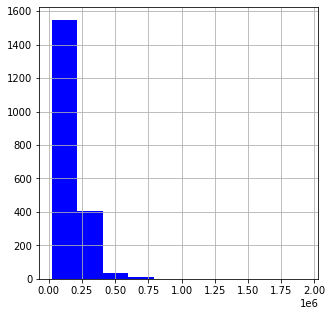

In [76]:
# dfのAMT_INCOME_TOTAL列のヒストグラムを作成
df = initialize(0)      # 初期化

df['AMT_INCOME_TOTAL'].hist(figsize=(5, 5), color='b')

### 棒グラフ

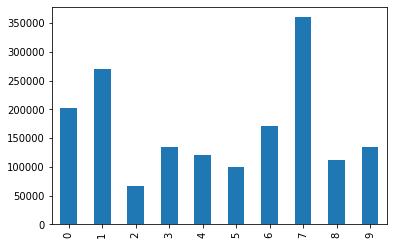

In [77]:
# AMT_INCOME_TOTAL列の最初の10列で棒グラフを作成
df = initialize(0)      # 初期化

df["AMT_INCOME_TOTAL"].head(10).plot(kind='bar')

### 積み上げ棒グラフ

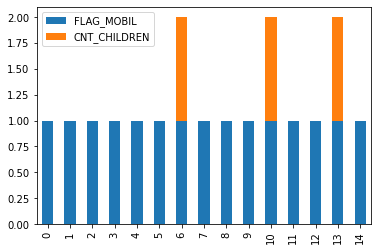

In [78]:
# FLAG_MOBILL列とCNT_CHILDREN列の先頭15行で積み上げ棒グラフを作成
# ※可視化の練習で、グラフに意味はないです
df = initialize(0)      # 初期化

df[["FLAG_MOBIL", "CNT_CHILDREN"]].head(15).plot(kind='bar', stacked=True)

###散布図

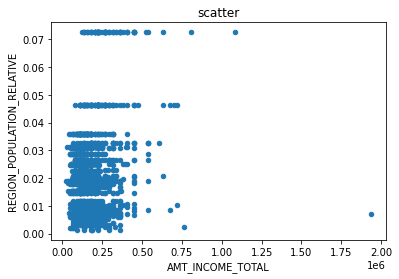

In [79]:
# AMT_INCOME_TOTAL列とREGION_POPULATION_RELATIVE列で散布図を作成
df = initialize(0)      # 初期化

df.plot(kind='scatter', x='AMT_INCOME_TOTAL', y='REGION_POPULATION_RELATIVE', title='scatter')

#日付データ

### datetime型に変換

In [80]:
# df_aのInvoiceDate列をdatatime型に変換する
df_a = initialize(2)      # 初期化

df_a["InvoiceDate"] = pd.to_datetime(df_a["InvoiceDate"])
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    2000 non-null   object        
 1   StockCode    2000 non-null   object        
 2   Description  1994 non-null   object        
 3   Quantity     2000 non-null   int64         
 4   InvoiceDate  2000 non-null   datetime64[ns]
 5   UnitPrice    2000 non-null   float64       
 6   CustomerID   1467 non-null   float64       
 7   Country      2000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 125.1+ KB


###dateti抽出me型のデータから年月日をそれぞれ抽出

In [81]:
# df_aのInvoiceDate列からYear、Month、Day列をそれぞれ追加する
# df_aは初期化されているのでdatatime型に変換してから取り組んでください
df_a = initialize(2)      # 初期化

date = pd.to_datetime(df_a["InvoiceDate"])

df_a['Year'] = date.dt.year
df_a['Month'] = date.dt.month
df_a['Day'] = date.dt.day

df_a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550781,17850.0,United Kingdom,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390625,17850.0,United Kingdom,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750000,17850.0,United Kingdom,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390625,17850.0,United Kingdom,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390625,17850.0,United Kingdom,2010,12,1



#ファイル出力

###csvファイルに出力

In [108]:
# dfを行番号、列番号を削除してoutput.csvという名前で出力
# 出力先は任意
df = initialize(0)      # 初期化

df.to_csv(
    '/content/output.csv',
    index=None,
    header=None
    )

### pickleファイルに出力

In [110]:
# dfを行番号、列番号を削除してsave_df.pllという名前で出力
# 出力先は任意
df = initialize(0)      # 初期化

df.to_pickle('./save_df.pkl')

#番外編：文字列変換

In [85]:
# 文字変換
df['NAME_CONTRACT_TYPE'].str.upper()      # すべて大文字に
df['NAME_CONTRACT_TYPE'].str.lower()      # すべて小文字に
df['NAME_CONTRACT_TYPE'].str.rstrip()     # 文字列の右側空白削除
df['NAME_CONTRACT_TYPE'].str.strip()      # 文字列の両端空白削除
df['NAME_CONTRACT_TYPE'].str.lstrip()     # 文字列の左側空白削除

df['NAME_CONTRACT_TYPE'].str.replace('Cash loans', 'Casg')  # 文字の置き換え(Cash loansをCashに置き換える)

0                  Casg
1                  Casg
2       Revolving loans
3                  Casg
4                  Casg
             ...       
1995               Casg
1996               Casg
1997    Revolving loans
1998    Revolving loans
1999               Casg
Name: NAME_CONTRACT_TYPE, Length: 2000, dtype: object